# 텐서플로 훑어보기

텐서플로는 강력한 수치 계산용 라이브러리임
- 구글 브레인 팀에서 개발했고 구글 클라우드 스피치, 구글 포토, 구글 검색과 같은 대규모 서비스에 사용됨


**텐서플로**가 제공하는 것들 요약
1. 핵심 구조는 넘파이와 매우 비슷하지만 GPU를 지원함
2. (여러 장치와 서버에 대해서) 분산 컴퓨팅을 지원함
3. 일종의 JIT(just-in-time) 컴파일러를 포함함. 속도를 높이고 메모리 사용량을 줄이기 위해 계산을 최적화함. 파이썬 함수에서 **계산 그래프**를 추출한 다음 최적화하고 효율적으로 실행함
4. 계산 그래프는 플랫폼에 중립적인 포맷으로 내보낼 수 있으므로 한 환경에서 텐서플로 모델을 훈련하고 다른 환경에서 실행할 수 있음
5. 텐서플로는 자동 미분 기능과 RMSProp, Nadam 같은 고성능 옵티마이저를 제공하므로 모든 종류의 손실 함수를 쉽게 최소화할 수 있음

- 데이터 적재와 전처리 연산(tf.data, tf.io)
- 이미지 처리 연산(tf.image)
- 신호 처리 연산(tf.signal) 등이 있음



가장 저수준의 텐서플로 연산은 매우 효율적인 C++ 코드로 구현되어 있음
- 많은 연산은 **커널**이라 부르는 여러 구현을 가짐
- 각 커널은 CPU, GPU, TPU(텐서 처리 장치)와 같은 특정 장치에 맞추어 만들어졌음
- TPU은 딥러닝 연산을 위해 특별하게 설계된 ASIC 칩임


# 넘파이처럼 텐서플로 사용하기

텐서는 넘파이 ndarray와 매우 비슷함
- 텐서는 일반적으로 다차원 배열이나 스칼라 값도 가질 수 있음

## 텐서와 연산

`tf.constant()` 함수로 텐서를 만들 수 있음

In [22]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.4 is required in this notebook
# Earlier 2.x versions will mostly work the same, but with a few bugs
import tensorflow as tf
from tensorflow import keras

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

# def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
#     path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
#     print("Saving figure", fig_id)
#     if tight_layout:
#         plt.tight_layout()
#     plt.savefig(path, format=fig_extension, dpi=resolution)

In [1]:
import tensorflow as tf

tf.constant([[1., 2., 3.], [4., 5., 6.]]) # 행렬

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [2]:
tf.constant(42) # 스칼라

<tf.Tensor: shape=(), dtype=int32, numpy=42>

In [3]:
t = tf.constant([[1., 2., 3.], [4., 5., 6.]])
t.shape

TensorShape([2, 3])

In [4]:
t.dtype

tf.float32

인덱스 참조도 매우 비슷하게 작동됨

In [5]:
t[:, 1:]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

In [6]:
t[..., 1, tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

텐서 연산이 가능함

In [7]:
t + 10

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [8]:
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [9]:
# 행렬 곱셈
t @ tf.transpose(t)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

`tf.add(t, 10)` : 더하기, `tf.matmul()` : 행렬 곱셈

## 텐서와 넘파이

텐서는 넘파이와 함께 사용하기 편리함
- 넘파이 배열로 텐서를 만들 수 있고 그 반대도 가능함

In [10]:
a = np.array([2., 4., 5.])
tf.constant(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([2., 4., 5.])>

In [11]:
t.numpy() # 또는 np.array(t)

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [12]:
tf.square(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 4., 16., 25.])>

## 타입 변환

타입 변환은 성능을 크게 감소시킬 수 있음
- 타입이 자동으로 변환되면 사용자가 눈치채지 못할 수 있음
- 호환되지 않은 타입의 텐서로 연산을 실행하면 예외가 발생함

In [13]:
tf.constant(2.) + tf.constant(40)

InvalidArgumentError: cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a int32 tensor [Op:AddV2]

In [14]:
tf.constant(2.) + tf.constant(40., dtype=tf.float64)

InvalidArgumentError: cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a double tensor [Op:AddV2]

`tf.cast()` 함수를 사용하여 타입을 변환함

In [15]:
t2 = tf.constant(40., dtype=tf.float64)
tf.constant(2.0) + tf.cast(t2, tf.float32)

<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

## 변수

`tf.Tensor`는 변경이 불가능한 객체이기 때문에 역전파로 변경되어야 하는 신경망의 가중치를 구현할 수 없음
- 따라서 `tf.Variable`로 변수를 선언해야함

`tf.Variable`은 `tf.Tensor`와 비슷하게 동작함

In [16]:
v = tf.Variable([[1., 2., 3.],[4., 5., 6.]])
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [17]:
v.assign(2 * v) # => [[2., 4., 6.], [8., 10., 12.]]
v[0, 1].assign(42) # => [[2., 42., 6.], [8., 10., 12.]]
v[:, 2].assign([0., 1.]) # => [[2., 42., 0.], [8., 10., 1.]]
v.scatter_nd_update(indices = [[0, 0], [1, 2]], updates=[100., 200.])
            # => [[100., 42., 0.], [8., 10., 200.]]

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[100.,  42.,   0.],
       [  8.,  10., 200.]], dtype=float32)>

## 다른 데이터 구조

희소 텐서 (`tf.SparseTensor`)
- 대부분 0으로 채워진 텐서

텐서 배열 (`tf.TensorArray`)
- 텐서의 리스트
- 기본적으로 고정된 길이를 가지지만 동적으로 바꿀 수 있음
- 리스트에 포함된 모든 텐서는 크기와 데이터 타입이 동일해야 함

래그드 텐서 (`tf.RaggedTensor`)
- 리스트의 리스트를 나타냄

문자열 텐서
- tf.string 타입의 텐서임
- 바이트 문자열을 나타내고 UTF-8로 인코딩됨

집합
- 일반적인 텐서로 나타냄
- `tf.sets` 패키지의 연산을 사용해 집합을 다룰 수 있음

큐
- 단계별로 텐서를 저장함
- FIFO 큐, 어떤 원소에 우선권을 주는 큐, 원소를 섞는 큐, 패딩을 추가하여 크기가 다른 원소의 배치를 만드는 큐

# 사용자 정의 모델과 훈련 알고리즘

회귀 모델을 훈련하는 데 훈련 세트에 잡음 데이터가 조금 있다고 가정하자. 비효율적이고 잡음 데이터가 남아 있을 때 어떻게 할까?
- 평균 제곱 오차는 큰 오차에 너무 과한 벌칙을 가하므로 정확하지 않은 모델이 만들어짐
- 평균 절댓값 오차는 이상치에 관대해서 훈련이 수렴되기까지 시간이 걸림
    - 모델이 정확하게 훈련되지 않음
- 후버 손실을 사용하면 좋음

In [19]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [18]:
def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < 1
    squared_loss = tf.square(error) / 2
    linear_loss = tf.abs(error) - 0.5
    return tf.where(is_small_error, squared_loss, linear_loss)

전체 손실의 평균이 아니라 샘플마다 하나의 손실을 담은 텐서를 반환하는 것이 좋음
- 이렇게 해야 필요할 때 케라스가 클래스 가중치나 샘플 가중치를 적용할 수 있음

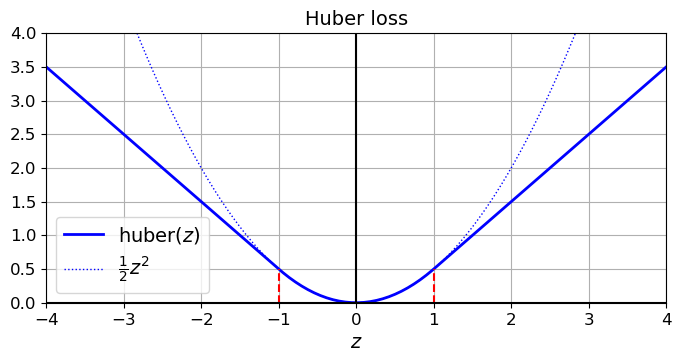

In [23]:
plt.figure(figsize=(8, 3.5))
z = np.linspace(-4, 4, 200)
plt.plot(z, huber_fn(0, z), "b-", linewidth=2, label="huber($z$)")
plt.plot(z, z**2 / 2, "b:", linewidth=1, label=r"$\frac{1}{2}z^2$")
plt.plot([-1, -1], [0, huber_fn(0., -1.)], "r--")
plt.plot([1, 1], [0, huber_fn(0., 1.)], "r--")
plt.gca().axhline(y=0, color='k')
plt.gca().axvline(x=0, color='k')
plt.axis([-4, 4, 0, 4])
plt.grid(True)
plt.xlabel("$z$")
plt.legend(fontsize=14)
plt.title("Huber loss", fontsize=14)
plt.show()

In [24]:
input_shape = X_train.shape[1:]

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [25]:
model.compile(loss=huber_fn, optimizer="nadam", metrics=["mae"])

In [26]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 0.5660 - mae: 0.9246 - val_loss: 0.2617 - val_mae: 0.5544
Epoch 2/2
363/363 [==============================] - 0s 973us/step - loss: 0.2126 - mae: 0.5075 - val_loss: 0.2154 - val_mae: 0.5042


`huber_fn()` 함수를 호출하여 손실을 계산하고 이를 사용해 경사 하강법을 수행함
- 에포크 시작부터 전체 손실을 기록하여 평균 손실을 출력함

## 사용자 정의 요소를 가진 모델을 저장하고 로드하기

모델을 로드할 때는 함수 이름과 실제 함수를 매핑한 딕셔너리를 전달해야함

In [29]:
model.save("my_model_with_a_custom_loss.h5")

In [30]:
model = keras.models.load_model("my_model_with_a_custom_loss.h5",
                                custom_objects={"huber_fn": huber_fn})

In [31]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 0.2016 - mae: 0.4924 - val_loss: 0.1898 - val_mae: 0.4722
Epoch 2/2
363/363 [==============================] - 0s 945us/step - loss: 0.1969 - mae: 0.4857 - val_loss: 0.1803 - val_mae: 0.4640
